In [1]:
#@title Install dependencies
%%time
import os
from zipfile import ZipFile
from google.colab import files
!git clone https://github.com/GMdSilva/DecAF_e
%cd DECAFold-E
!pip install .
%cd ..


Cloning into 'DECAFold-E'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 87 (delta 33), reused 43 (delta 18), pack-reused 26
Receiving objects: 100% (87/87), 80.15 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Updating files: 100% (18/18), done.
/content/DECAFold-E
Processing /content/DECAFold-E
  Preparing metadata (setup.py) ... done
  Created wheel for decafold-e: filename=decafold_e-0.1.0-py3-none-any.whl size=11840 sha256=0b02b070e57a561f16a1c6cb5787e2ec8aaf99959e30e0c2cdd301a3a5abae37
  Stored in directory: /root/.cache/pip/wheels/ca/e0/9d/74d2ef338fca1bc233a7e8398423dea9d46b2142ab95fa9fd3
Successfully built decafold-e
/content
CPU times: user 169 ms, sys: 35.3 ms, total: 205 ms
Wall time: 22.7 s


In [2]:
#@title Set Model Parameters

from decaf_e.model import ModelBuilder
from decaf_e.train import train_and_save_model, k_fold
from decaf_e.visualize_weights import compare_class_attention
from decaf_e.utils import create_results_folder, load_pkl_and_report_shape

trial = 'pi3k_wt'#@param

epochs = 10 #@param
batch_size = 4 #@param
dense_layers = 200 #@param
dropout_rate = 0.1 #@param
data_pos = 0 #@param
label_pos = 1 #@param

data_path = f'decaf_e/example_labeled_datasets/{trial}'
save_path = f'decaf_e_example/results/{trial}'
save_path_model = f'{save_path}/models/ep_{epochs}_ba_{batch_size}_dl_{dense_layers}_dr_{dropout_rate}.h5'

create_results_folder(f"decaf_e_example/results/{trial}")
create_results_folder(f"decaf_e_example/results/{trial}/plots")
create_results_folder(f"decaf_e_example/results/{trial}/csv")
create_results_folder(f"decaf_e_example/results/{trial}/sequences")
create_results_folder(f"decaf_e_example/results/{trial}/models")

seq_len = load_pkl_and_report_shape(data_path)

msa_model = ModelBuilder(seq_len,
                         dense_layers,
                         dropout_rate).create_model()

Folder 'DECAFold-E_example/results/pi3k_wt' created.
Folder 'DECAFold-E_example/results/pi3k_wt/plots' created.
Folder 'DECAFold-E_example/results/pi3k_wt/csv' created.
Folder 'DECAFold-E_example/results/pi3k_wt/sequences' created.
Folder 'DECAFold-E_example/results/pi3k_wt/models' created.


Loading DECAFold-E/af2_datasets/pi3k_wt/part_1_pi3k_wt_labeled.pkl
Label 0 Sample Size: 407
Label 1 Sample Size: 407
Current data shape: (814, 373, 23)
Current labels shape: (814,)
Loading DECAFold-E/af2_datasets/pi3k_wt/part_0_pi3k_wt_labeled.pkl
Label 0 Sample Size: 622
Label 1 Sample Size: 622
Current data shape: (1244, 373, 23)
Current labels shape: (1244,)
Total data shape: (2058, 373, 23)
Total labels shape: (2058,)
Training fold 1/5...
Epoch 1/10
412/412 [==============================] - 9s 7ms/step - loss: 0.6954 - accuracy: 0.4866 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
412/412 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4781 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
412/412 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.4866 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.4866 - val_loss: 0.6931 - val_ac

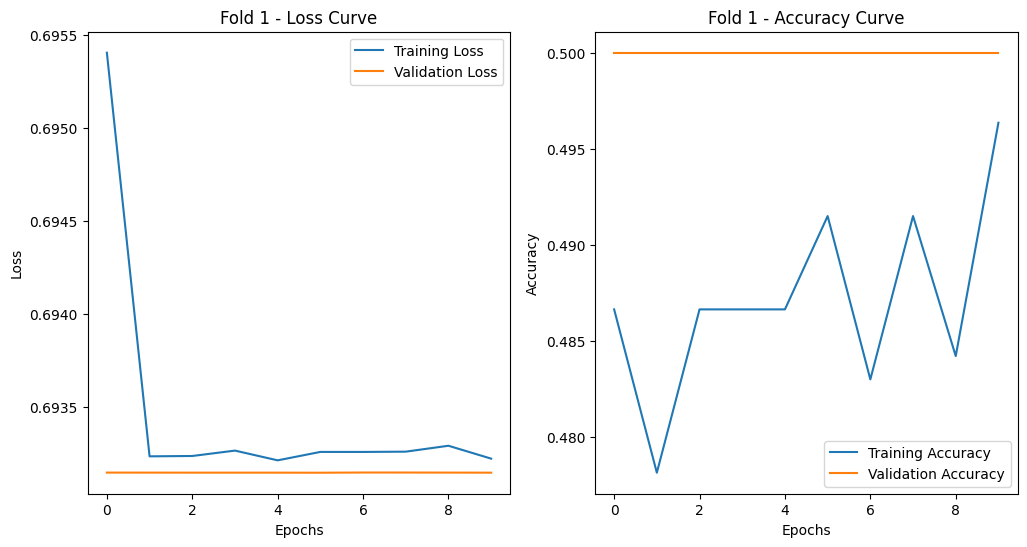

Training fold 2/5...
Epoch 1/10
412/412 [==============================] - 4s 6ms/step - loss: 0.5662 - accuracy: 0.6914 - val_loss: 0.1275 - val_accuracy: 0.9854
Epoch 2/10
412/412 [==============================] - 2s 6ms/step - loss: 0.0692 - accuracy: 0.9848 - val_loss: 0.0853 - val_accuracy: 0.9709
Epoch 3/10
412/412 [==============================] - 2s 4ms/step - loss: 0.0402 - accuracy: 0.9860 - val_loss: 0.0328 - val_accuracy: 0.9879
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9933 - val_loss: 0.0336 - val_accuracy: 0.9903
Epoch 5/10
412/412 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0361 - val_accuracy: 0.9903
Epoch 6/10
412/412 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9951 - val_loss: 0.0380 - val_accuracy: 0.9903
Epoch 7/10
412/412 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9909 - val_loss: 0.0347 - val_ac

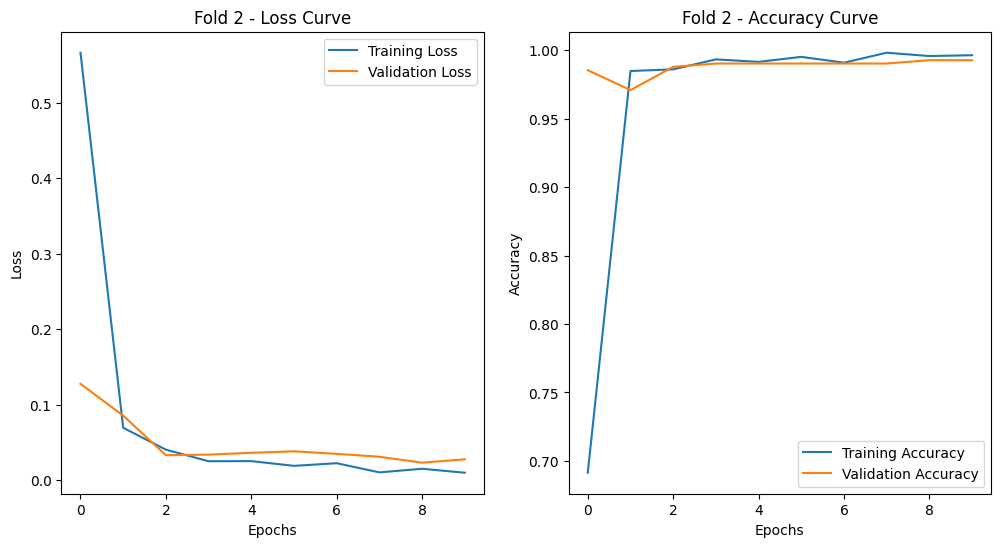

Training fold 3/5...
Epoch 1/10
412/412 [==============================] - 3s 5ms/step - loss: 0.4785 - accuracy: 0.7533 - val_loss: 0.0827 - val_accuracy: 0.9927
Epoch 2/10
412/412 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9860 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 3/10
412/412 [==============================] - 3s 6ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.0336 - val_accuracy: 0.9927
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0263 - val_accuracy: 0.9927
Epoch 5/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0238 - val_accuracy: 0.9927
Epoch 6/10
412/412 [==============================] - 2s 4ms/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.0293 - val_accuracy: 0.9927
Epoch 7/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9939 - val_loss: 0.0180 - val_ac

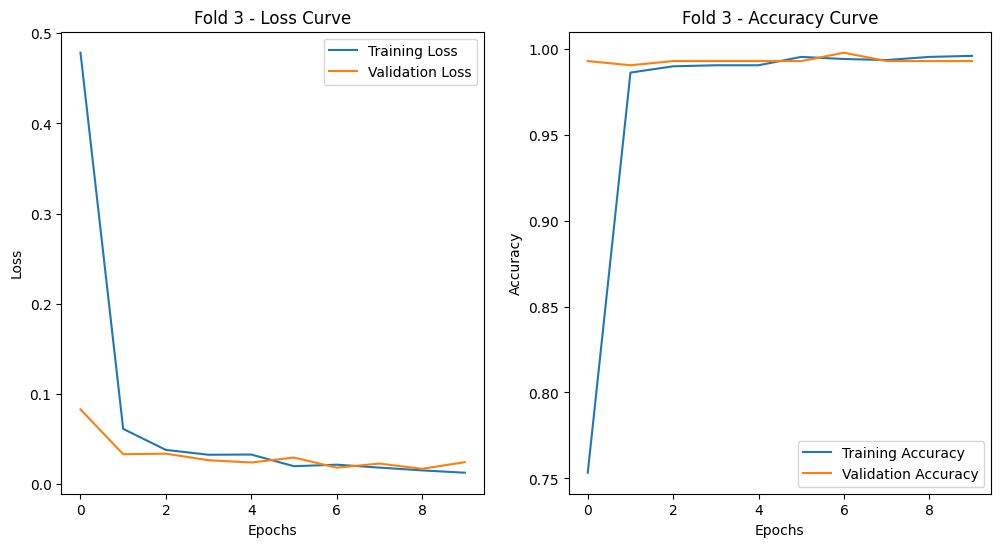

Training fold 4/5...
Epoch 1/10
412/412 [==============================] - 3s 5ms/step - loss: 0.4646 - accuracy: 0.7644 - val_loss: 0.1230 - val_accuracy: 0.9757
Epoch 2/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0597 - accuracy: 0.9903 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 3/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0362 - accuracy: 0.9903 - val_loss: 0.0291 - val_accuracy: 0.9878
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.0249 - val_accuracy: 0.9927
Epoch 5/10
412/412 [==============================] - 3s 7ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0498 - val_accuracy: 0.9830
Epoch 6/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0148 - val_accuracy: 0.9951
Epoch 7/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.0206 - val_ac

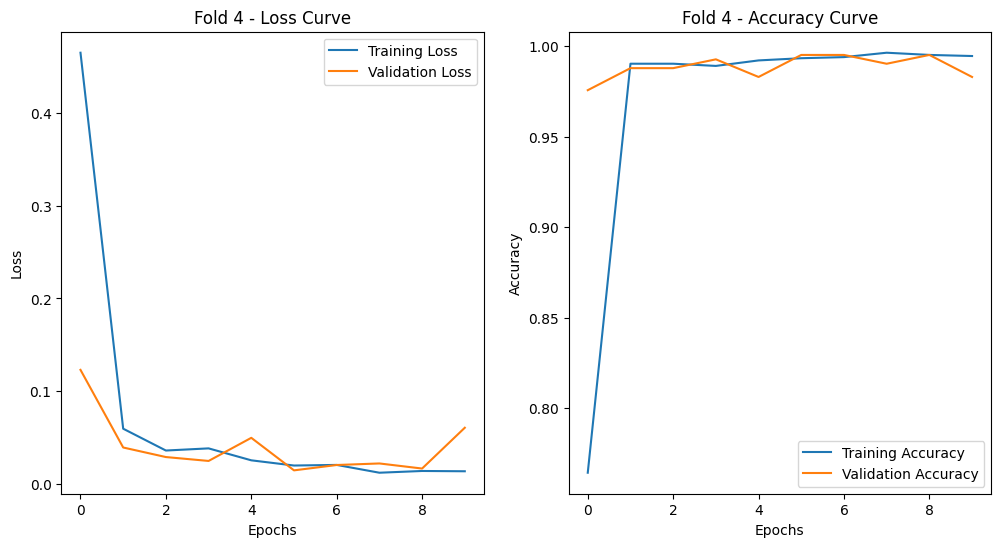

Training fold 5/5...
Epoch 1/10
412/412 [==============================] - 4s 6ms/step - loss: 0.6948 - accuracy: 0.5252 - val_loss: 0.6929 - val_accuracy: 0.5012
Epoch 2/10
412/412 [==============================] - 2s 5ms/step - loss: 0.5882 - accuracy: 0.7262 - val_loss: 0.3189 - val_accuracy: 0.9611
Epoch 3/10
412/412 [==============================] - 2s 5ms/step - loss: 0.1599 - accuracy: 0.9678 - val_loss: 0.0711 - val_accuracy: 0.9878
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0774 - accuracy: 0.9806 - val_loss: 0.0510 - val_accuracy: 0.9805
Epoch 5/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.0420 - val_accuracy: 0.9854
Epoch 6/10
412/412 [==============================] - 2s 5ms/step - loss: 0.0510 - accuracy: 0.9866 - val_loss: 0.0422 - val_accuracy: 0.9854
Epoch 7/10
412/412 [==============================] - 3s 7ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0343 - val_ac

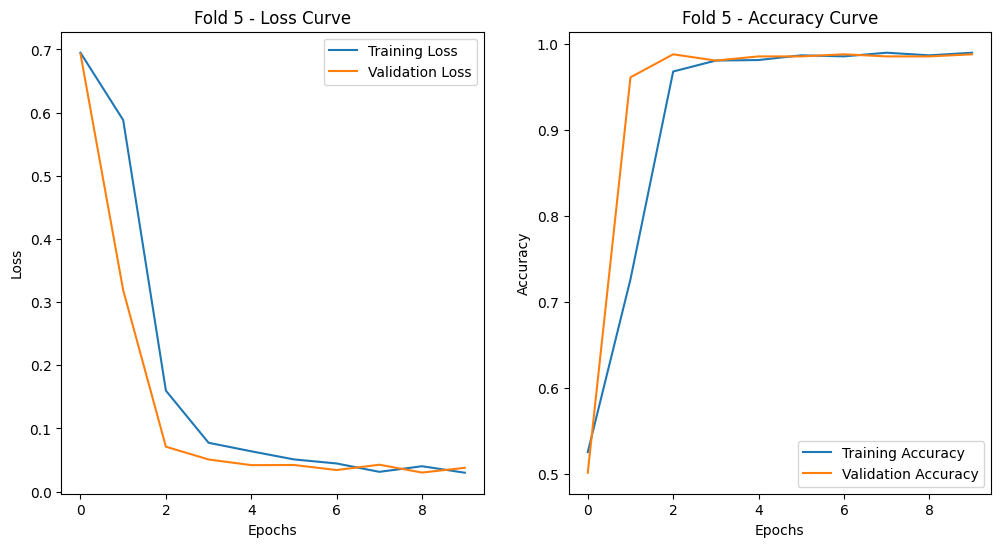

Validation accuracies for each fold: [0.5, 0.9927184581756592, 0.9927184581756592, 0.9829683899879456, 0.9878345727920532]
Average validation accuracy: 0.8912479758262635


In [3]:
#@title Train Model and do K-Fold Validation

k_fold(data_path,
       save_path,
       seq_len,
       dense_layers,
       dropout_rate,
       batch_size,
       epochs,
       data_pos,
       label_pos)

In [4]:
#@title Train Model with all Data and Save to Disk

train_and_save_model(msa_model,
                     data_path,
                     save_path_model,
                     batch_size,
                     epochs,
                     data_pos,
                     label_pos)

Loading DECAFold-E/af2_datasets/pi3k_wt/part_1_pi3k_wt_labeled.pkl
Label 0 Sample Size: 407
Label 1 Sample Size: 407
Current data shape: (814, 373, 23)
Current labels shape: (814,)
Loading DECAFold-E/af2_datasets/pi3k_wt/part_0_pi3k_wt_labeled.pkl
Label 0 Sample Size: 622
Label 1 Sample Size: 622
Current data shape: (1244, 373, 23)
Current labels shape: (1244,)
Total data shape: (2058, 373, 23)
Total labels shape: (2058,)
Epoch 1/10
515/515 [==============================] - 3s 4ms/step - loss: 0.6913 - accuracy: 0.5219
Epoch 2/10
515/515 [==============================] - 2s 4ms/step - loss: 0.6680 - accuracy: 0.6011
Epoch 3/10
515/515 [==============================] - 2s 4ms/step - loss: 0.6017 - accuracy: 0.7119
Epoch 4/10
515/515 [==============================] - 2s 4ms/step - loss: 0.0886 - accuracy: 0.9864
Epoch 5/10
515/515 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9937
Epoch 6/10
515/515 [==============================] - 3s 6ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading DECAFold-E/af2_datasets/pi3k_wt/part_1_pi3k_wt_labeled.pkl
Label 0 Sample Size: 407
Label 1 Sample Size: 407
Current data shape: (814, 373, 23)
Current labels shape: (814,)
Loading DECAFold-E/af2_datasets/pi3k_wt/part_0_pi3k_wt_labeled.pkl
Label 0 Sample Size: 622
Label 1 Sample Size: 622
Current data shape: (1244, 373, 23)
Current labels shape: (1244,)
Total data shape: (2058, 373, 23)
Total labels shape: (2058,)
65/65 [==============================] - 0s 2ms/step
Saving Heatmap of Class 0 to: DECAFold-E_example/results/pi3k_wt/plots/pi3k_wt_class_0_median_positive_attention_heatmap.png


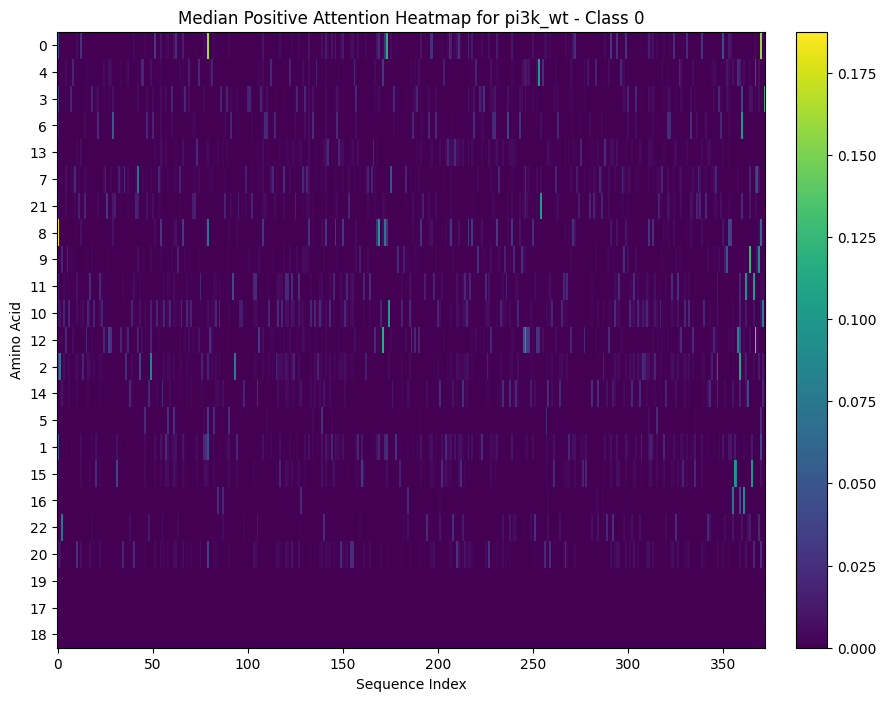

Saving Bar Plot of Class 0 to: DECAFold-E_example/results/pi3k_wt/plots/pi3k_wt_class_0_summed_median_positive_attention.png


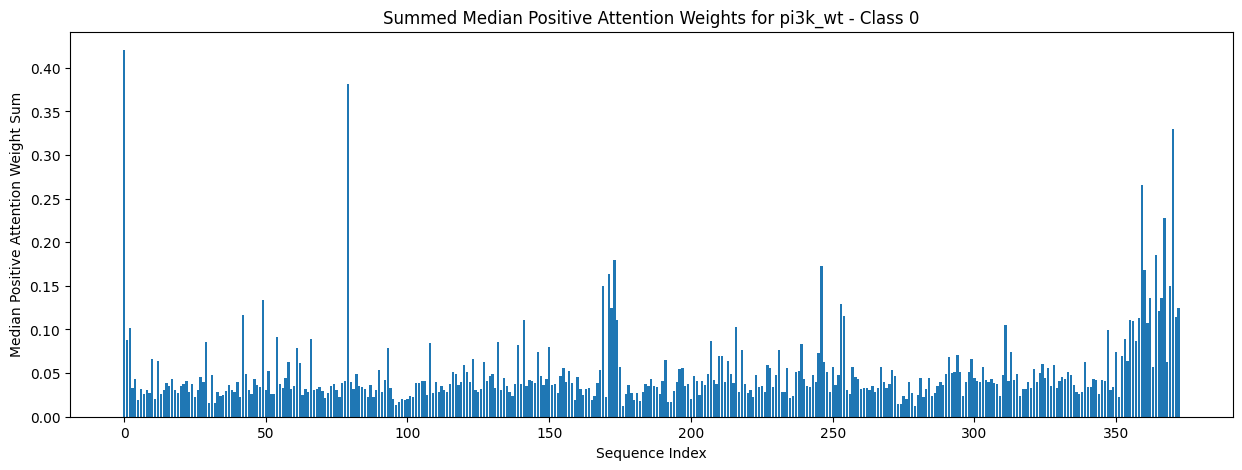

Saving CSV data of label_0_summed_median_positive_attention_weights to: DECAFold-E_example/results/pi3k_wt/csv/label_0_summed_median_positive_attention_weights.csv
Loading DECAFold-E/af2_datasets/pi3k_wt/part_1_pi3k_wt_labeled.pkl
Label 0 Sample Size: 407
Label 1 Sample Size: 407
Current data shape: (814, 373, 23)
Current labels shape: (814,)
Loading DECAFold-E/af2_datasets/pi3k_wt/part_0_pi3k_wt_labeled.pkl
Label 0 Sample Size: 622
Label 1 Sample Size: 622
Current data shape: (1244, 373, 23)
Current labels shape: (1244,)
Total data shape: (2058, 373, 23)
Total labels shape: (2058,)
65/65 [==============================] - 0s 2ms/step
Saving Heatmap of Class 1 to: DECAFold-E_example/results/pi3k_wt/plots/pi3k_wt_class_1_median_positive_attention_heatmap.png


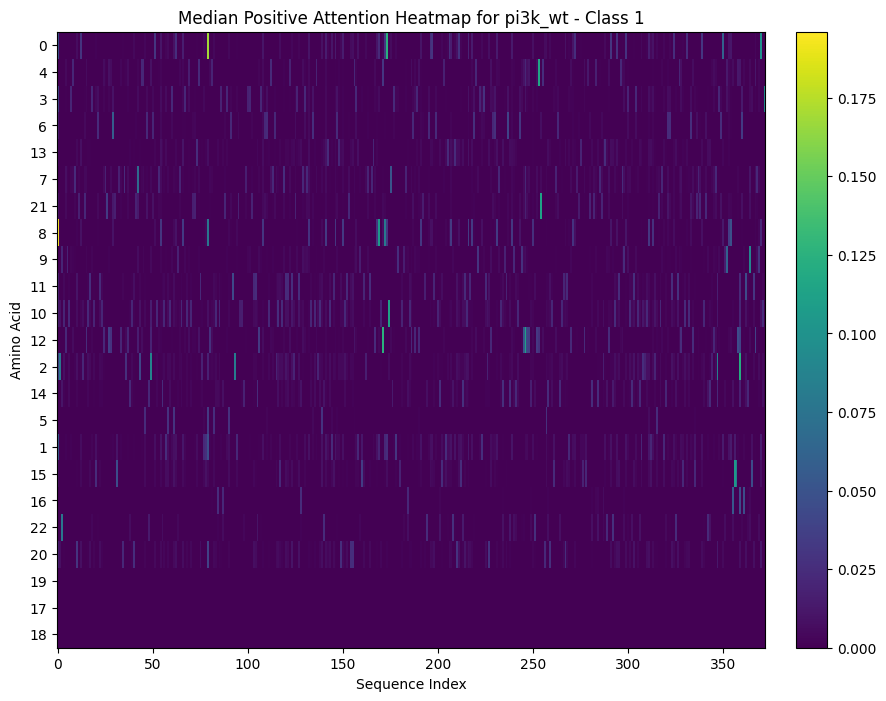

Saving Bar Plot of Class 1 to: DECAFold-E_example/results/pi3k_wt/plots/pi3k_wt_class_1_summed_median_positive_attention.png


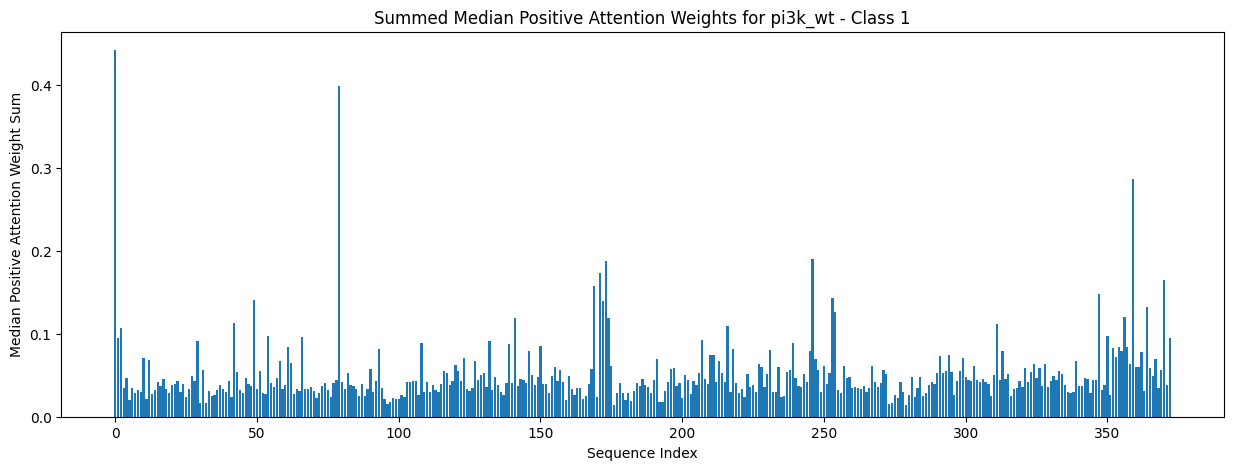

Saving CSV data of label_1_summed_median_positive_attention_weights to: DECAFold-E_example/results/pi3k_wt/csv/label_1_summed_median_positive_attention_weights.csv
Saving Bar Plot of Class 0 - Class 1 diff to: DECAFold-E_example/results/pi3k_wt/plots/DECAFold-E_example/results/pi3k_wt/plots/pi3k_wt_class_diff_summed_median_attention.png


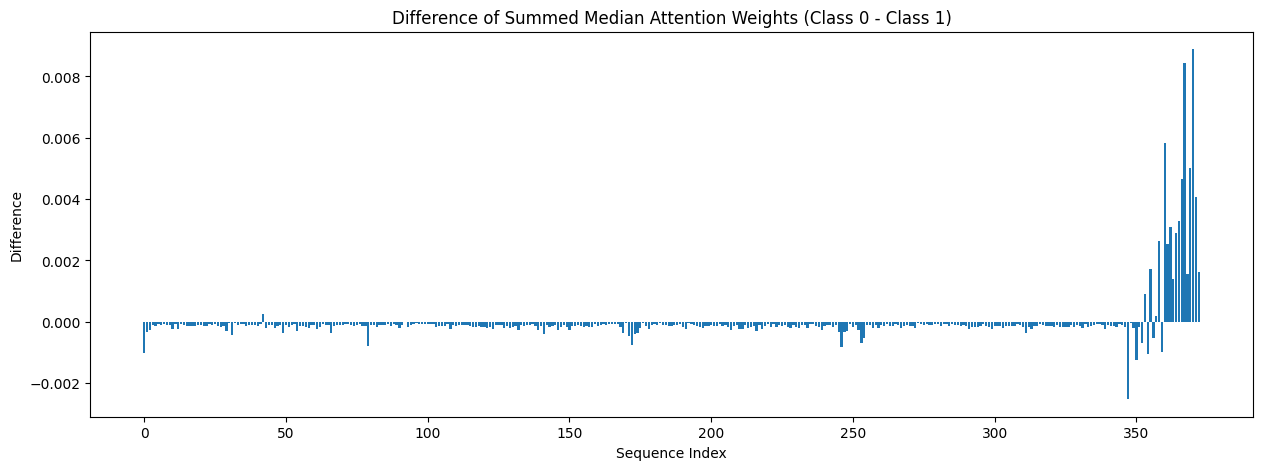

Saving Heatmap of Class 0 - Class 1 diff to: DECAFold-E_example/results/pi3k_wt/plots/pi3k_wt_class_diff_2d_median_attention.png


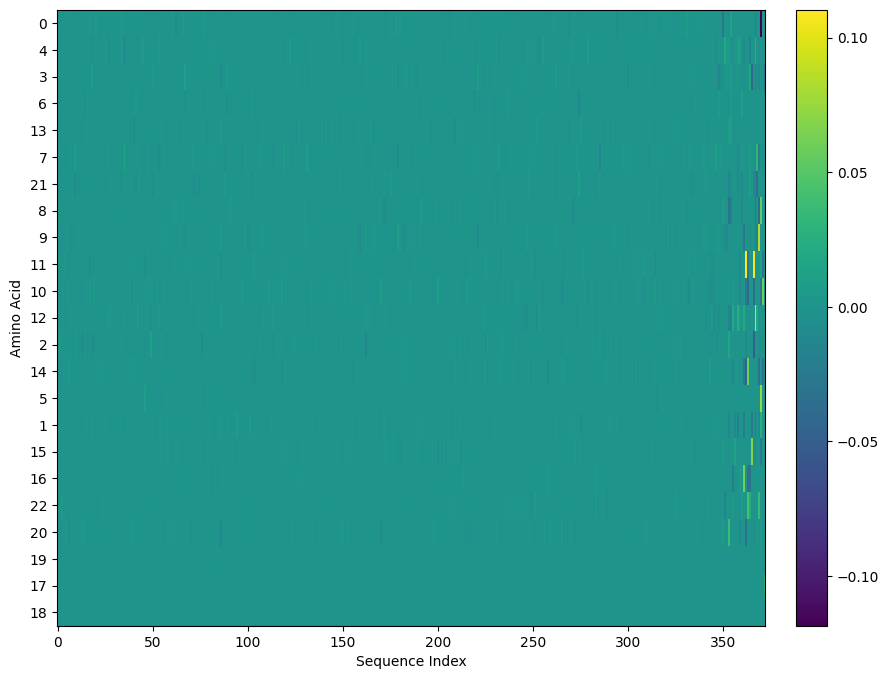

Saving sequence of of Rank 1 max attention weights for label 0 to: DECAFold-E_example/results/pi3k_wt/sequences/label_0_rank_1_max_attention_weights_seq.txt
Saving CSV data of label_0_rank_1_top_attention_weights to: DECAFold-E_example/results/pi3k_wt/csv/label_0_rank_1_top_attention_weights.csv
Saving sequence of of Rank 2 max attention weights for label 0 to: DECAFold-E_example/results/pi3k_wt/sequences/label_0_rank_2_max_attention_weights_seq.txt
Saving CSV data of label_0_rank_2_top_attention_weights to: DECAFold-E_example/results/pi3k_wt/csv/label_0_rank_2_top_attention_weights.csv
Saving sequence of of Rank 1 max attention weights for label 1 to: DECAFold-E_example/results/pi3k_wt/sequences/label_1_rank_1_max_attention_weights_seq.txt
Saving CSV data of label_1_rank_1_top_attention_weights to: DECAFold-E_example/results/pi3k_wt/csv/label_1_rank_1_top_attention_weights.csv
Saving sequence of of Rank 2 max attention weights for label 1 to: DECAFold-E_example/results/pi3k_wt/sequenc

In [5]:
#@title Analyze Attention Weights

compare_class_attention(save_path_model,
                      save_path,
                      data_path,
                      data_pos,
                      label_pos,
                      trial)
